## Problem Statement: 

* In the competitive fitness industry, understanding customer behavior and preferences is vital for strategic decision-making.
* Our goal is to analyze the customer data collected from Aerofit Fitness and gain actionable insights into various aspects of customer behavior. 
* This analysis will assist in tailoring marketing strategies, product offerings, and customer experiences to better align with customer preferences.
* The analysis involves investigating the relationships between different variables as mentioned below.
* Basic metrics: gender, marital status, education, age, income, fitness level, and product purchases. 

Importing required libraries

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Importing dataset

In [3]:
file_path = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749.csv'

In [4]:
# Display the first few rows
data = pd.read_csv(file_path)
print(data.head())

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


## Data analysis

In [5]:
# Get information about the columns, data types, and non-null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


In [6]:
# Create the product_price DataFrame
product_price = pd.DataFrame({
    "Product": ["KP281", "KP481", "KP781"],
    "Product_price": [1500, 1750, 2500]
})

# Merge the product_price DataFrame with the original data based on the "Product" column
data = data.merge(product_price, on="Product")

# Now you have a DataFrame "data_with_price" that includes the price information for each product
print(data)


    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   KP781   40    Male         21        Single      6        5   83416   
176   KP781   42    Male         18        Single      5        4   89641   
177   KP781   45    Male         16        Single      5        5   90886   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  Product_price  
0      112           1500  
1       75         

In [7]:
# Shape of Data
print(data.shape)

(180, 10)


In [8]:
# Data types of attributes
print(data.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
Product_price     int64
dtype: object


In [9]:
# Missing Value Detection
print(data.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Product_price    0
dtype: int64


In [10]:
# Check the number of unique values in each column
print(data.nunique())

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
Product_price     3
dtype: int64


In [11]:
# Individual product count

product_count = data['Product'].value_counts()
print(product_count)

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


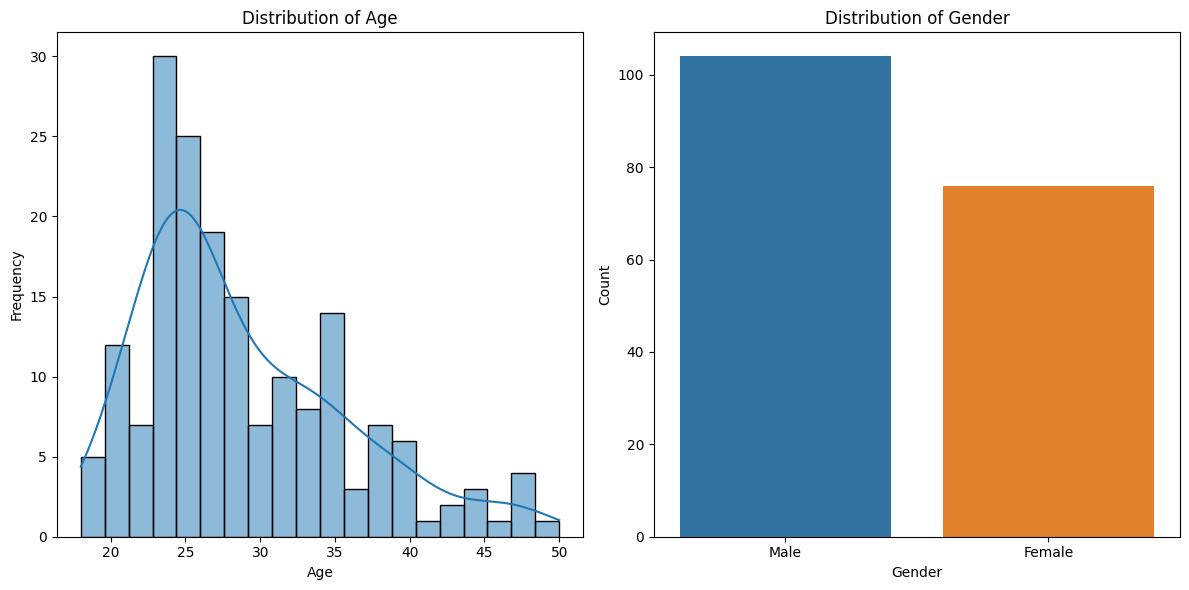

In [12]:
# Distribution of Age and gender
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of Age
sns.histplot(data['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution of Gender
sns.countplot(data=data, x='Gender', ax=axes[1])
axes[1].set_title('Distribution of Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


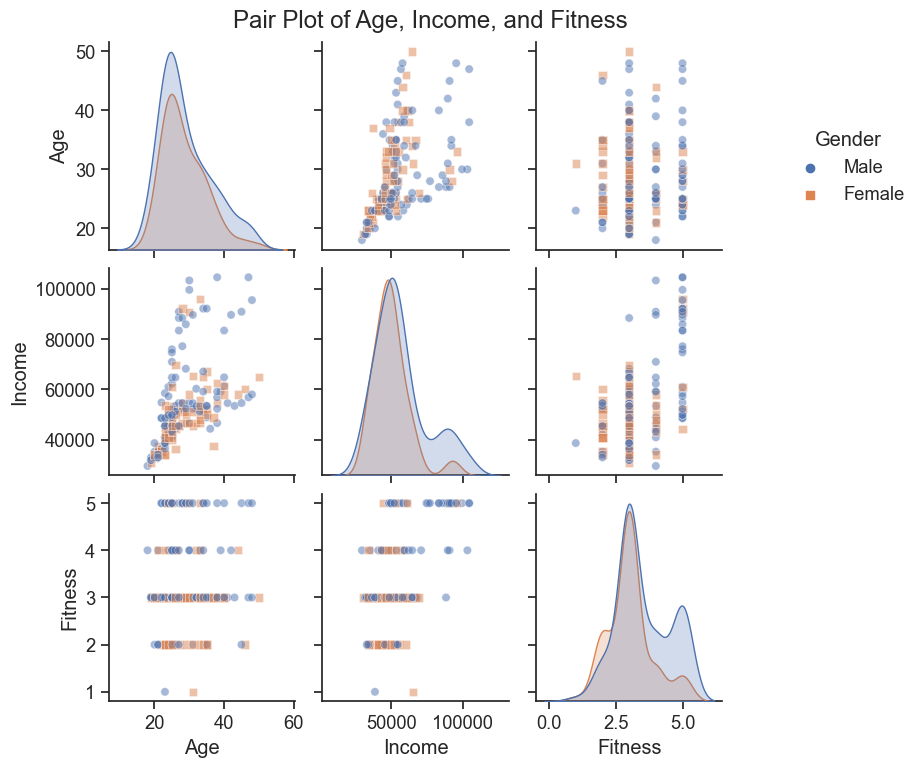

In [13]:
# Pair plot for Age, Income, Fitness based on Gender
# Set style and context
sns.set(style="ticks", font_scale=1.2)

# Create the pair plot
pairplot = sns.pairplot(data, vars=['Age', 'Income', 'Fitness'], hue='Gender', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha':0.5})

# Set plot title
pairplot.fig.suptitle('Pair Plot of Age, Income, and Fitness', y=1.02)

# Adjust legend position
pairplot._legend.set_bbox_to_anchor((1.05, 0.8))
pairplot._legend.set_title('Gender')

# Show the plot
plt.show()


## Outlier Detection

In [14]:
# Statistical summary of the dataset
data.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


Business insights:

* The most common product category is 'KP281', with a frequency of 80 times.
* The data indicates that there are more male customers represented in the dataset compared to female, with a frequency of 104 timess
* Higher number of customers in the dataset are partnered (married or in a domestic partnership) compared to single customers, with a frequency of 107 times..

In [15]:
# Used the interquartile range (IQR) method to identify outliers

# Define a function to count outliers using IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(column[(column < lower_bound) | (column > upper_bound)])

# Count outliers for each numerical column
numeric_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
outliers_count = data[numeric_columns].apply(count_outliers)

print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
Age           5
Education     4
Usage         9
Fitness       2
Income       19
Miles        13
dtype: int64


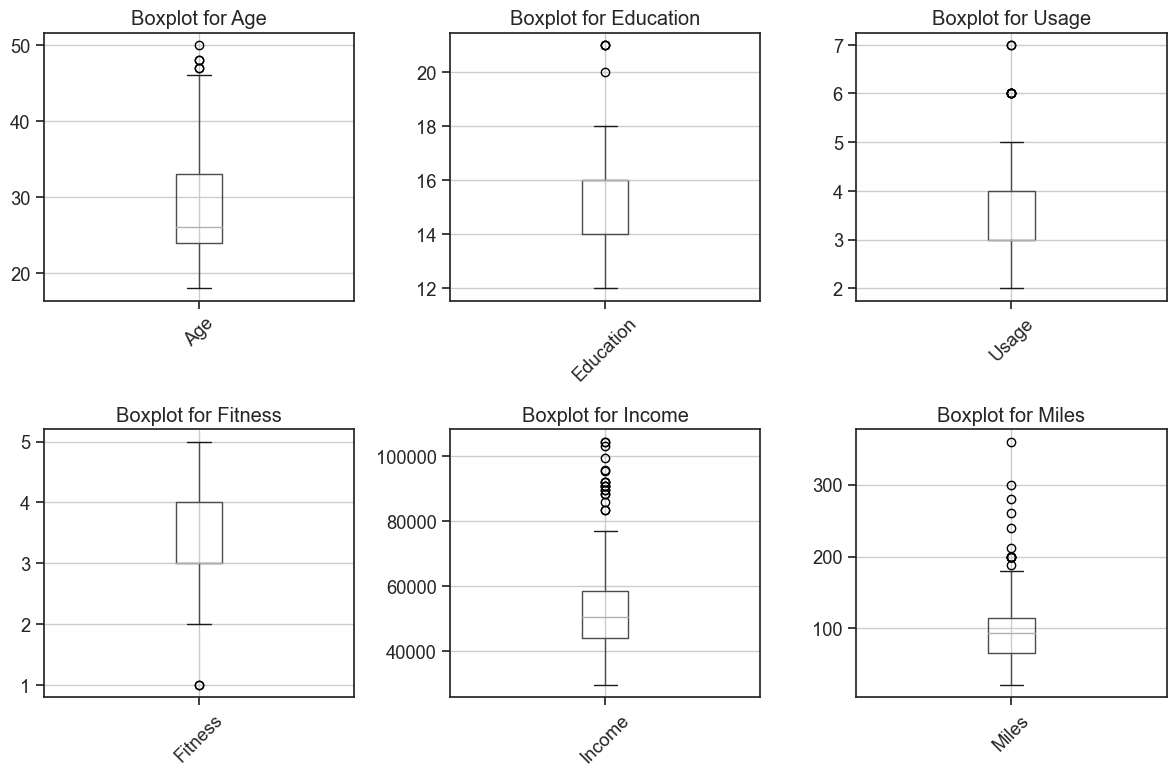

In [16]:
# Create boxplots for each numerical column to visualize outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    data.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
# Calculate the median for each numerical column
medians = data[numeric_columns].median()

print("Median values for each numerical column:")
print(medians)

Median values for each numerical column:
Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64


In [18]:
# Calculate the median for each numerical column
mean = data[numeric_columns].mean()

print("Mean values for each numerical column:")
print(mean)

Mean values for each numerical column:
Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64


In [19]:
# Calculate mean and median for each numerical column
mean_median_diff = mean - medians

# Display the difference between mean and median
print("Difference between Mean and Median:")
print(mean_median_diff)


Difference between Mean and Median:
Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64


Business insights:

* The positive difference in the 'Age' column suggests that there are a few older customers in the dataset.
* The negative difference in the 'Education' column indicates that there might be a few customers with higher education levels.
* The positive difference in the 'Fitness' column suggests that some customers might have rated their fitness level higher than the median rating, causing a slight upward shift in the mean. 
* The significant difference in the 'Income' column highlights the presence of some high-income customers, which may represent a valuable customer segment for targeted marketing or personalized services.
* The positive difference in the 'Age' column suggests that there might be a few customers who expect to walk or run more miles.

## Customer Profiling

In [20]:
# Selecting relevant features for clustering
features_for_clustering = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features_for_clustering])

# Set the value of n_init explicitly to suppress the warning
n_init = 10

# Perform K-Means clustering to categorize customers into clusters
n_clusters = 3  # Number of desired clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Explore the distribution of customers among clusters
print("Customer distribution among clusters:")
print(data['Cluster'].value_counts())

# Analyze the characteristics of each cluster
cluster_profiles = data.groupby('Cluster')[features_for_clustering].mean()
print("Cluster Profiles:")
print(cluster_profiles)

Customer distribution among clusters:
Cluster
1    97
2    45
0    38
Name: count, dtype: int64
Cluster Profiles:
               Age  Education     Usage   Fitness        Income       Miles
Cluster                                                                    
0        29.736842  17.394737  4.868421  4.710526  76221.973684  173.868421
1        24.711340  14.628866  3.113402  2.958763  43718.010309   86.659794
2        36.777778  16.066667  3.000000  2.888889  56276.488889   79.155556


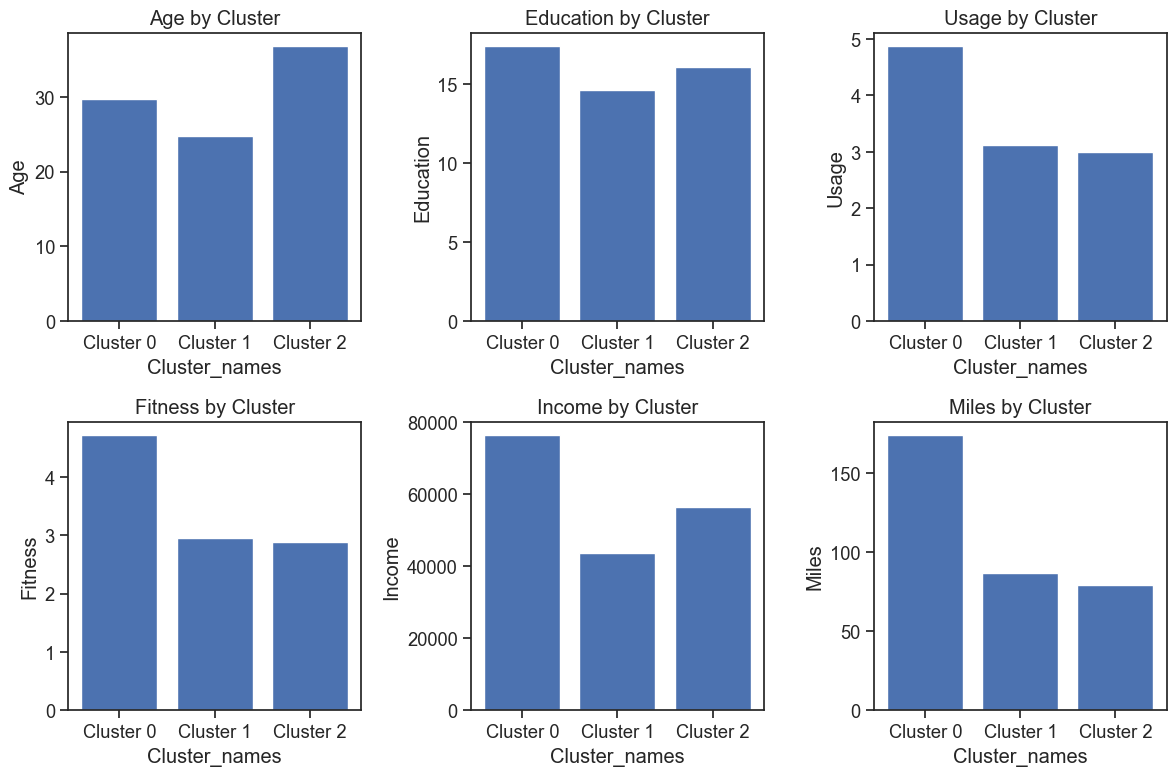

In [21]:
# Define cluster names
cluster_names = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2'
}

# Cluster Profiles
cluster_profiles = data.groupby('Cluster')[features_for_clustering].mean()

# Plotting the bar plots for each cluster's characteristics
plt.figure(figsize=(12, 8))
for i, column in enumerate(cluster_profiles.columns, 1):
    plt.subplot(2, 3, i)
    plt.bar(cluster_names.values(), cluster_profiles[column])
    plt.title(f'{column} by Cluster')
    plt.xlabel('Cluster_names')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


Business insights:

* Cluster 0 seems to be the group of customers who are relatively older, highly educated, and have higher usage of the treadmill. They also rate their fitness level as high and have a relatively higher income. They expect to cover a significant distance in terms of miles each week.* Cluster 1 represents a younger segment with lower education and relatively lower usage of the treadmill. Their fitness ratings and income are also   lower compared to the other clusters, and they expect to cover fewer miles each week.* * 
Cluster 2 consists of customers with an intermediate age and education level. They have moderate treadmill usage, fitness ratings, and income. Their expected mileage is also moderate.

## Check if features of dataset have any effect on the product purchased 

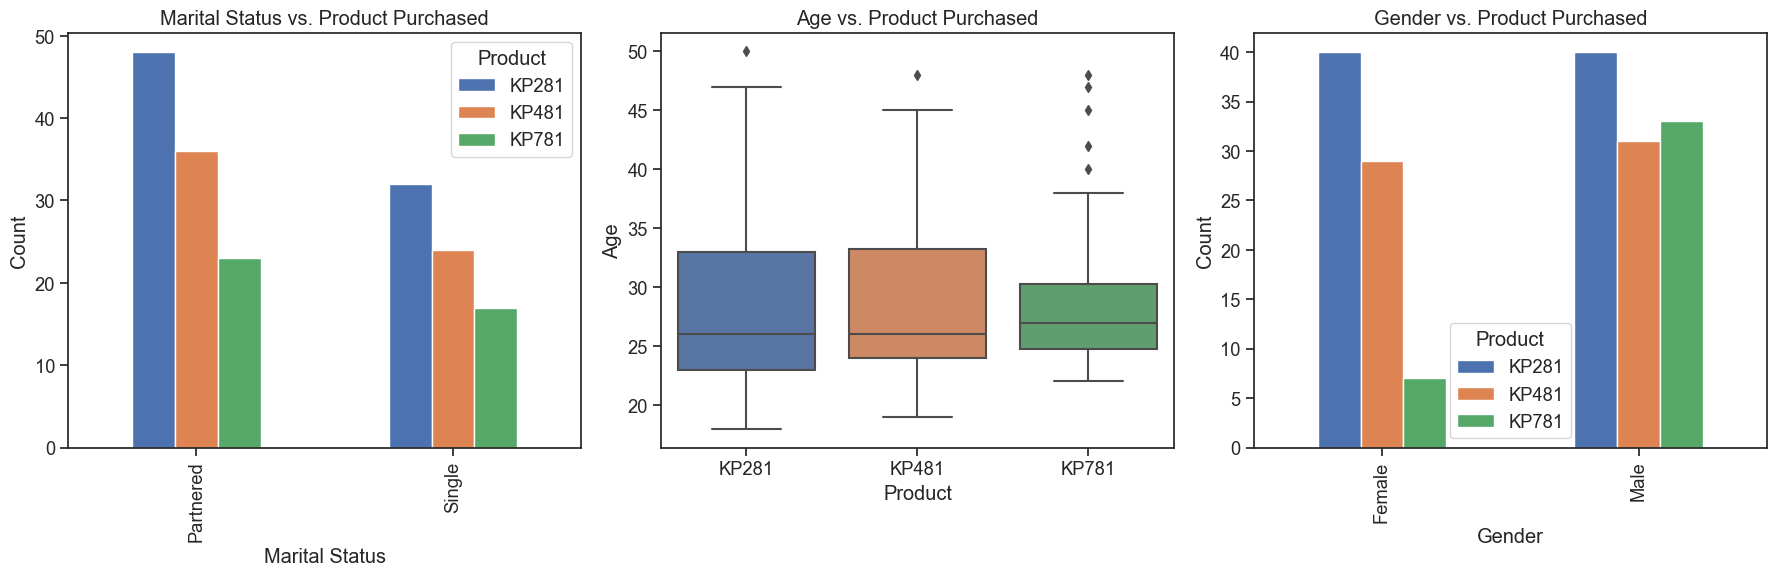

In [22]:
# Countplot for MaritalStatus vs. Product Purchased
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Countplot for MaritalStatus vs. Product Purchased
marital_count = data.groupby(['MaritalStatus', 'Product']).size().unstack()
marital_count.plot(kind='bar', ax=axes[0])
axes[0].set_title('Marital Status vs. Product Purchased')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')
axes[0].legend(title='Product')

# Boxplot for Age vs. Product Purchased
sns.boxplot(ax=axes[1], x='Product', y='Age', data=data)
axes[1].set_title('Age vs. Product Purchased')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Age')

# Countplot for Gender vs. Product Purchased
gender_count = data.groupby(['Gender', 'Product']).size().unstack()
gender_count.plot(kind='bar', ax=axes[2])
axes[2].set_title('Gender vs. Product Purchased')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')
axes[2].legend(title='Product')

plt.tight_layout()
plt.show()


In [23]:
# effect of gender on product purchased

print(gender_count)

Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33


# Business insights:

* Both males and females have shown interest in purchasing all product types (KP281, KP481, KP781). 
* Among all products, KP781 treadmill has the highest preference among males.
* The KP281 treadmill appears to have an equal distribution across genders.
* Considering gender preferences when marketing or tailoring features for each treadmill model could lead to better customer engagement and sales.

In [24]:
# effect of martial status on product purchased

print(marital_count)

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17


# Business insights:

* Customers who are partnered show a higher interest in purchasing all three treadmill models compared to single customers.
* KP281 has a relatively balanced distribution between partnered and single customers, indicating a broad appeal across marital statuses.

In [25]:
# effect of age on product purchased
# Custom function to calculate age range

def age_range(group):
    return f"{group.min()} - {group.max()}"

# Grouping data by 'Product' and aggregating the required statistics
age_stats = data.groupby('Product')['Age'].agg(['mean', 'median', lambda x: x.mean() - x.median(), age_range])

# Renaming the columns for clarity
age_stats.columns = ['Mean Age', 'Median Age', 'Age Difference', 'Age Range']

print(age_stats)

         Mean Age  Median Age  Age Difference Age Range
Product                                                
KP281       28.55        26.0            2.55   18 - 50
KP481       28.90        26.0            2.90   19 - 48
KP781       29.10        27.0            2.10   22 - 48


# Business insights:

* All three treadmill models (KP281, KP481, KP781) attract customers within a similar age range.
* There is only a slight difference in mean ages among the treadmill models, suggesting that age may not be a strong differentiating factor in product choice.
* The age range for all products varies from 18 to around 50 years, indicating a diverse customer base spanning different age groups.

## Marginal probability

In [26]:
# Calculate the marginal probability using crosstab
marginal_prob = pd.crosstab(index=data['Product'], columns='count', normalize=True) * 100

# Display the marginal probability table
print(round(marginal_prob, 2))


col_0    count
Product       
KP281    44.44
KP481    33.33
KP781    22.22


# Business insights:

* KP281 treadmill holds the largest share of customers with approximately 44.44%. This suggests that customers are attracted to its affordability and basic features.
* KP481 treadmill captures around 33.33% of customers. This indicates a significant interest in the mid-level model, possibly due to a balance between features and pricing.
* KP781 treadmill, equipped with advanced features, attracts approximately 22.22% of customers. This suggests that there is a segment of customers who value premium features and are willing to invest in them.
* Overall, the KP281 model might benefit from emphasizing its affordability, the KP481 could emphasize its balanced features, and the KP781 could highlight its advanced capabilities.

## Correlation among different factors

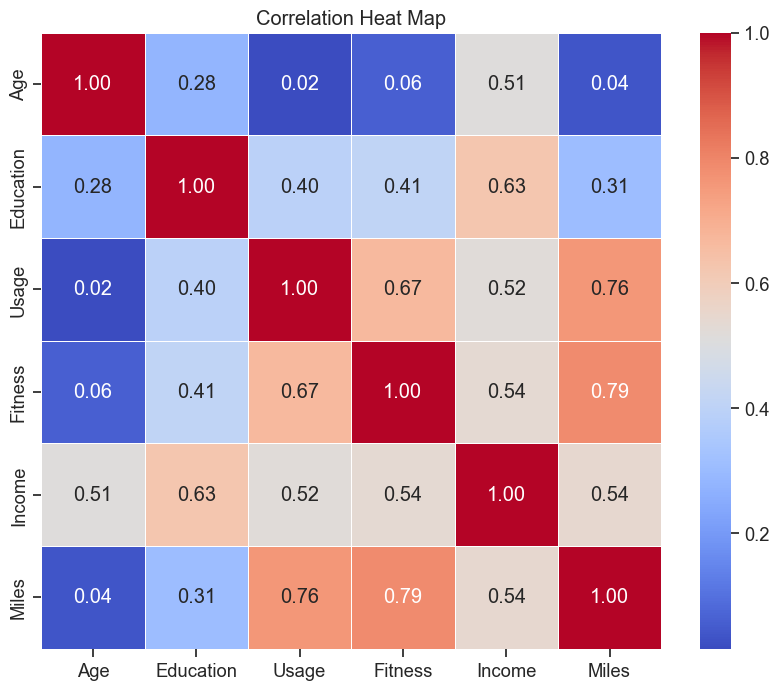

In [27]:
# Select numerical columns for correlation computation
numeric_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Compute the correlation matrix for numerical columns
correlation_matrix = data[numeric_columns].corr()

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()


# Business insights:

* The heatmap suggests that there is a slight negative correlation between Age and the product purchased. This indicates that younger customers may be more inclined towards purchasing the KP781 treadmill, while older customers might lean towards the KP281 or KP481.
* Education seems to have a moderate positive correlation with the product purchased. Customers with higher education levels may be more interested in the KP781 treadmill.
* The heatmap reveals a noticeable correlation between Usage and the product purchased. Customers who plan to use the treadmill more frequently might be inclined towards the KP781 or KP481 models.
* Fitness has a moderate positive correlation with the product purchased. Customers who rate themselves as more fit might prefer the KP781 or KP481 treadmills.
* The heatmap indicates a moderate positive correlation between Income and the product purchased. This suggests that customers with higher incomes might be more likely to opt for the KP781 treadmill.
*  Miles, which represents the average number of miles customers expect to walk/run, also has a moderate correlation with the product purchased.
*  Customers with plans for longer distances might lean towards the KP781 or KP481 models.ces.




g


## Probability of customer (based on gender) buying treadmill

In [28]:
# Create a crosstabulation table for Product and Gender
product_gender_crosstab = pd.crosstab(data['Product'], data['Gender'])

# Calculate the total count of each gender
total_male_count = product_gender_crosstab.loc[:, 'Male'].sum()
total_female_count = product_gender_crosstab.loc[:, 'Female'].sum()

# Calculate the probabilities for each product and gender
probabilities_male = (product_gender_crosstab.loc[:, 'Male'] / total_male_count) * 100
probabilities_female = (product_gender_crosstab.loc[:, 'Female'] / total_female_count) * 100

# Create a DataFrame to store the probabilities
probabilities_df = pd.DataFrame({
    'Male': probabilities_male, 
    'Female': probabilities_female
})

print(round(probabilities_df , 2))

          Male  Female
Product               
KP281    38.46   52.63
KP481    29.81   38.16
KP781    31.73    9.21


# Business insights:

* KP281 product seems to be preferred more by females (52.63%) compared to males (38.46%).
* 
KP1 product seems to be preferred by b Both males (29.81%) and females (38.1681, although it's slightly more favored by female
* 

KP781: Surprisingly, KP781 is more popular a han males (31. than females (9.21%)73nce.

In [29]:
## Revenue generation based on products

In [30]:
# Calculate average purchase value

average_purchase_value = data.groupby("Product")["Product_price"].mean()
print(average_purchase_value)

Product
KP281    1500.0
KP481    1750.0
KP781    2500.0
Name: Product_price, dtype: float64


In [31]:
# Calculate total revenue for each product

product_revenue = data.groupby(['Product'])['Product_price'].sum().reset_index()
product_revenue.rename(columns={'Product': 'Product', 'Product_price': 'Product_revenue'}, inplace=True)
product_revenue.set_index('Product', inplace=True)

print(product_revenue)

         Product_revenue
Product                 
KP281             120000
KP481             105000
KP781             100000


<Figure size 1000x600 with 0 Axes>

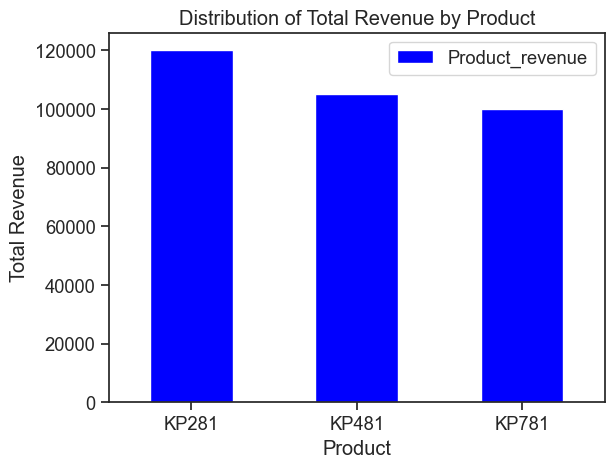

In [32]:
# Create a bar plot

plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribution of Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

# Business insights:

* KP281 product has the highest total revenue among the three, with a revenue of $120,000. This suggests that KP281 is the most popular product in terms of revenue generation. 
* 
KP4 product has t The second-highest total revenue is associated with KP481, with a revenue of $105,000. While slightly lower than KP281, KP481 is still a significant contributor to overall revenu 
* 81: KP781 has the lowest total revenue among the three products, with a revenue of $100,000. This indicates that KP781 might have a slightly lower customer demand compared to the other two products.

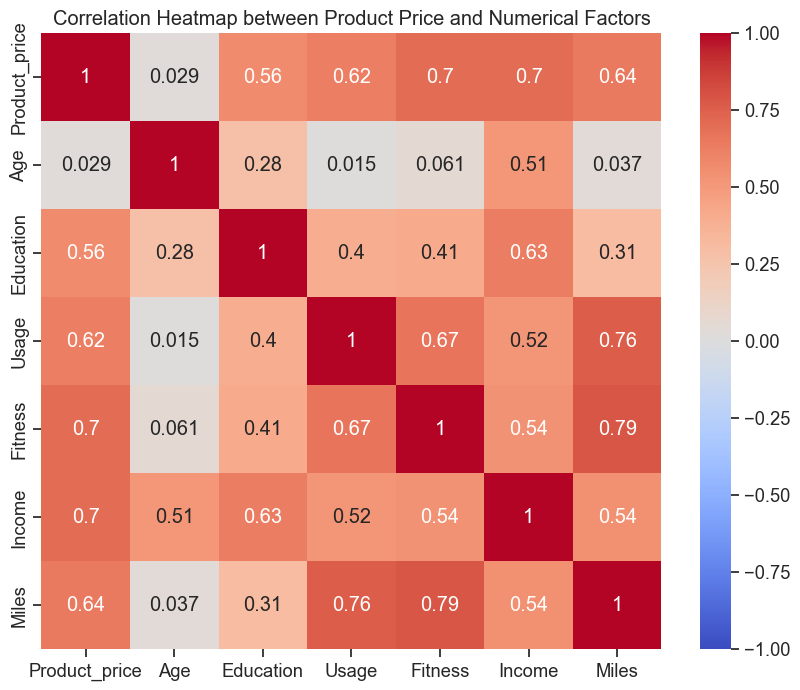

In [33]:
# Calculate the correlation matrix between Product Price and other numerical factors
correlation_price_factors = data[["Product_price", "Age", "Education", "Usage", "Fitness", "Income", "Miles"]].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_price_factors, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Product Price and Numerical Factors')
plt.show()


# Business insights:

* There is a positive correlation between product price and various factors like education, income, usage, fitness, and miles.
* Products with higher prices tend to attract customers with higher education levels and incomes.
* The positive correlation between price and usage, as well as miles, suggests that customers who purchase higher-priced treadmills might be planning to use them intensively.

## Conditional Probability

In [34]:
# Conditional Probability of Purchasing a Specific Product Given Gender

crosstab_gender_product = pd.crosstab(data['Gender'], data['Product'], normalize='index')
print("Conditional Probability of Purchasing a Specific Product Given Gender:")
print(crosstab_gender_product)


Conditional Probability of Purchasing a Specific Product Given Gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


# Business insight:

* Among females, KP281 is the most preferred product, followed by KP481 and then KP781.
* Among males, KP281 is more popular product, followed by KP781 and then KP481.

In [35]:
# Conditional Probability of Gender Given a Specific Product

conditional_prob_gender_given_product = data.groupby('Product')['Gender'].value_counts() / data.groupby('Product')['Gender'].count()
print("Conditional Probability of Gender given Product:")
print(conditional_prob_gender_given_product)


Conditional Probability of Gender given Product:
Product  Gender
KP281    Female    0.500000
         Male      0.500000
KP481    Male      0.516667
         Female    0.483333
KP781    Male      0.825000
         Female    0.175000
dtype: float64


# Business insight:

* For KP281, there's an equal split between genders.
* For KP481, slightly more males purchase it.
* For KP781, the majority of buyers are males.

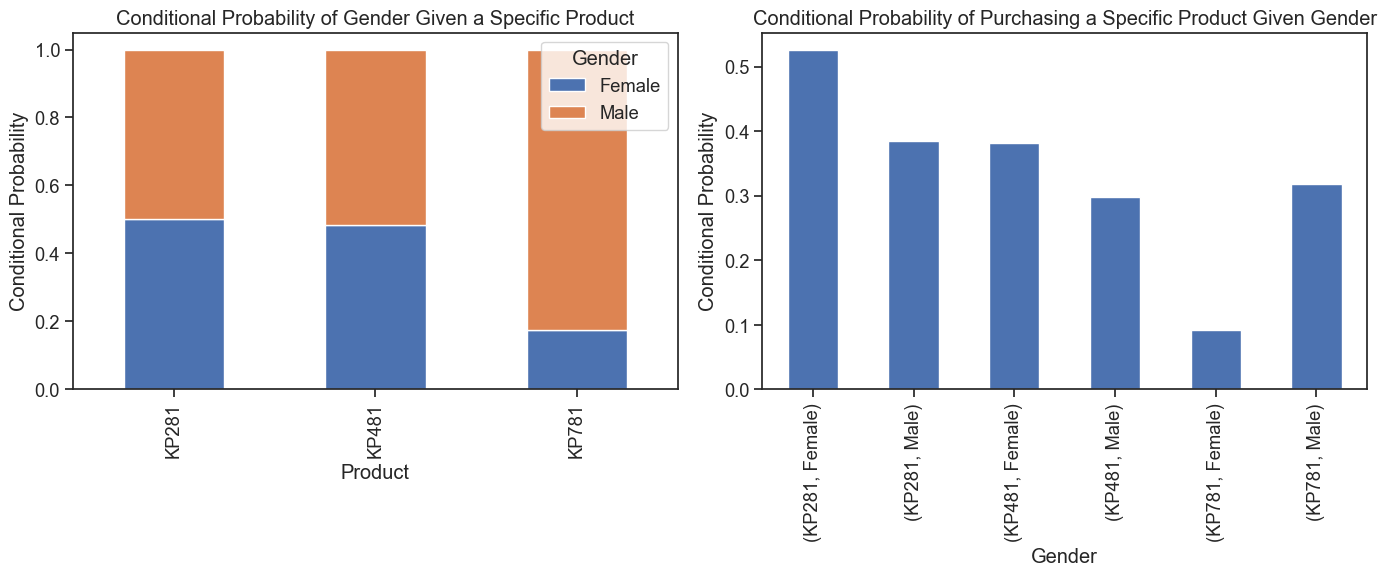

In [36]:
# Stacked bar chart
plt.figure(figsize=(14, 6))

# Conditional Probability of Gender given Product
ax1 = plt.subplot(1, 2, 1)
conditional_prob_gender_given_product.unstack().plot(kind='bar', stacked=True, ax=ax1)
plt.title('Conditional Probability of Gender Given a Specific Product')
plt.xlabel('Product')
plt.ylabel('Conditional Probability')
plt.legend(title='Gender')

# Conditional Probability of Product given Gender
ax2 = plt.subplot(1, 2, 2)
crosstab_gender_product.unstack().plot(kind='bar', stacked=True, ax=ax2)
plt.title('Conditional Probability of Purchasing a Specific Product Given Gender')
plt.xlabel('Gender')
plt.ylabel('Conditional Probability')

plt.tight_layout()
plt.show()


In [37]:
# Calculate conditional probability of Marital Status given Product
marital_product_crosstab = pd.crosstab(data['MaritalStatus'], data['Product'], normalize='index')

print("Conditional Probability of Marital Status given Product:")
print(marital_product_crosstab)


Conditional Probability of Marital Status given Product:
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877


In [38]:
# Calculate conditional probabilities  of Product given Marital Status
conditional_probabilities_maritial = pd.crosstab(data['Product'], data['MaritalStatus'], normalize='index') * 100

print("Conditional Probability of Product given Marital Status:")
print(conditional_probabilities_maritial)


Conditional Probability of Product given Marital Status:
MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.5    42.5


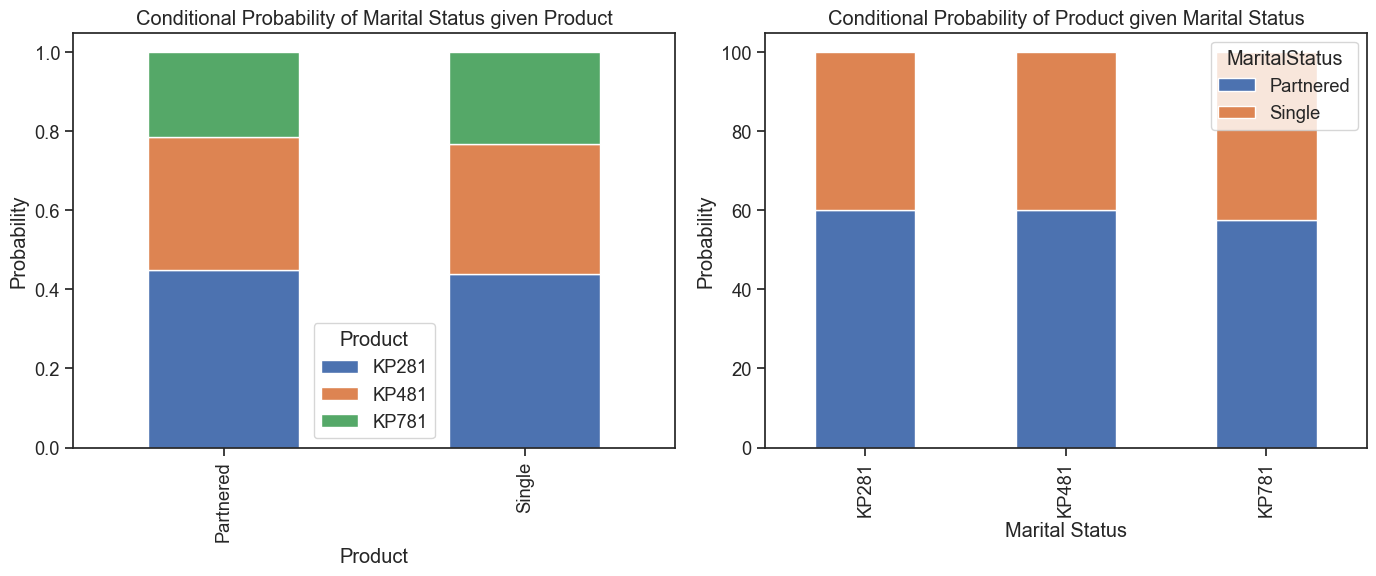

In [39]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar plot for Conditional Probability of Marital Status given Product
marital_product_crosstab.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Conditional Probability of Marital Status given Product')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Probability')

# Stacked bar plot for Conditional Probability of Product given Marital Status
conditional_probabilities_maritial.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Conditional Probability of Product given Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Probability')

# Adjust layout
plt.tight_layout()
plt.show()


# Business insights:

* KP281 is mostly prefered by partnered as well as single.
* Followed by KP481 and KP781.

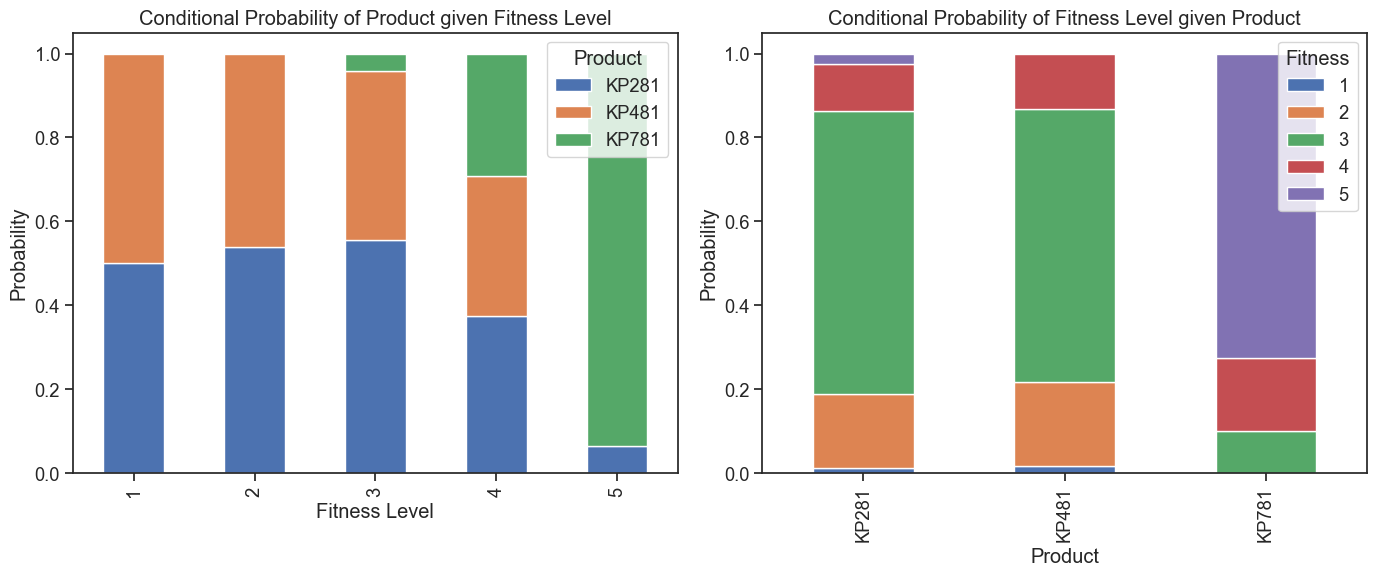

In [40]:
# Calculate conditional probabilities of Product given Fitness
conditional_prob_product_given_fitness = pd.crosstab(index=data['Fitness'], columns=data['Product'], normalize='index')

# Calculate conditional probabilities of Fitness given Product
conditional_prob_fitness_given_product = pd.crosstab(index=data['Product'], columns=data['Fitness'], normalize='index')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar plot for Conditional Probability of Product given Fitness
conditional_prob_product_given_fitness.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Conditional Probability of Product given Fitness Level')
axes[0].set_xlabel('Fitness Level')
axes[0].set_ylabel('Probability')

# Stacked bar plot for Conditional Probability of Fitness given Product
conditional_prob_fitness_given_product.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Conditional Probability of Fitness Level given Product')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Probability')

# Adjust layout
plt.tight_layout()
plt.show()


In [41]:
# Calculate conditional probabilities of Product given Fitness
print(conditional_prob_product_given_fitness)


Product     KP281     KP481     KP781
Fitness                              
1        0.500000  0.500000  0.000000
2        0.538462  0.461538  0.000000
3        0.556701  0.402062  0.041237
4        0.375000  0.333333  0.291667
5        0.064516  0.000000  0.935484


In [42]:
# Calculate conditional probabilities of Fitness given Product
print(conditional_prob_fitness_given_product) 

Fitness         1      2      3         4      5
Product                                         
KP281    0.012500  0.175  0.675  0.112500  0.025
KP481    0.016667  0.200  0.650  0.133333  0.000
KP781    0.000000  0.000  0.100  0.175000  0.725


# Business insights:

* Customers with Fitness Level 1 have an equal likelihood of purchasing either KP281 or KP481.
* Customers with Fitness Level 1 and 2 show a relatively more balanced distribution across KP281 and KP481.
* KP781 seems to be favored by customers with higher fitness levels (4 and 5).

In [43]:
# Calculate conditional probabilities of Martial status given Fitness

conditional_prob_fitness_given_marital = pd.crosstab(index=data['Fitness'], columns=data['MaritalStatus'], normalize='index')
print(conditional_prob_fitness_given_marital)

MaritalStatus  Partnered    Single
Fitness                           
1               0.500000  0.500000
2               0.692308  0.307692
3               0.587629  0.412371
4               0.541667  0.458333
5               0.580645  0.419355


In [44]:
# Calculate conditional probabilities of Fitness given martial status

conditional_prob_marital_given_fitness = pd.crosstab(index=data['MaritalStatus'], columns=data['Fitness'], normalize='index')
print(conditional_prob_marital_given_fitness)

Fitness               1         2         3         4         5
MaritalStatus                                                  
Partnered      0.009346  0.168224  0.532710  0.121495  0.168224
Single         0.013699  0.109589  0.547945  0.150685  0.178082


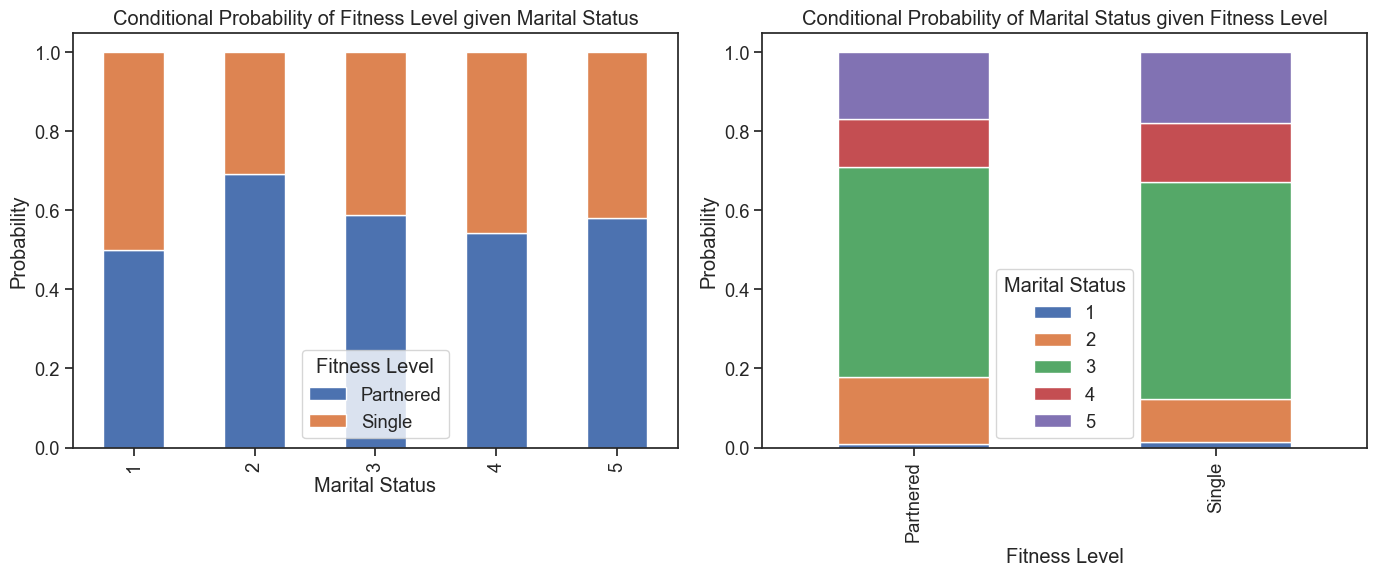

In [45]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar plot for Conditional Probability of Fitness given Marital Status
conditional_prob_fitness_given_marital.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Conditional Probability of Fitness Level given Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Probability')
axes[0].legend(title='Fitness Level')

# Stacked bar plot for Conditional Probability of Marital Status given Fitness Level
conditional_prob_marital_given_fitness.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Conditional Probability of Marital Status given Fitness Level')
axes[1].set_xlabel('Fitness Level')
axes[1].set_ylabel('Probability')
axes[1].legend(title='Marital Status')

# Adjust layout
plt.tight_layout()
plt.show()

# Business insights:

* Higher fitness levels are more likely to be Partnered.
* Fitness Level 3 seems to be a common point of interest, having the highest probability for both Partnered and Single individuals.

In [46]:
# Calculate conditional probabilities of Products given Income

conditional_prob_product_given_income = data.groupby(pd.cut(data['Income'], bins=[0, 30000, 60000, 90000]))['Product'].value_counts() / data.groupby(pd.cut(data['Income'], bins=[0, 30000, 60000, 90000]))['Product'].count()
print(conditional_prob_product_given_income) 

Income          Product
(0, 30000]      KP281      1.000000
                KP481      0.000000
                KP781      0.000000
(30000, 60000]  KP281      0.532847
                KP481      0.386861
                KP781      0.080292
(60000, 90000]  KP781      0.566667
                KP481      0.233333
                KP281      0.200000
dtype: float64


In [47]:
# Calculate conditional probabilities of Income ranges given Products

conditional_prob_income_given_product = data.groupby('Product')['Income'].apply(lambda x: pd.cut(x, bins=[0, 30000, 60000, 90000]).value_counts(normalize=True)).unstack()
print(conditional_prob_income_given_product)

         (0, 30000]  (30000, 60000]  (60000, 90000]
Product                                            
KP281        0.0125        0.912500        0.075000
KP481        0.0000        0.883333        0.116667
KP781        0.0000        0.392857        0.607143


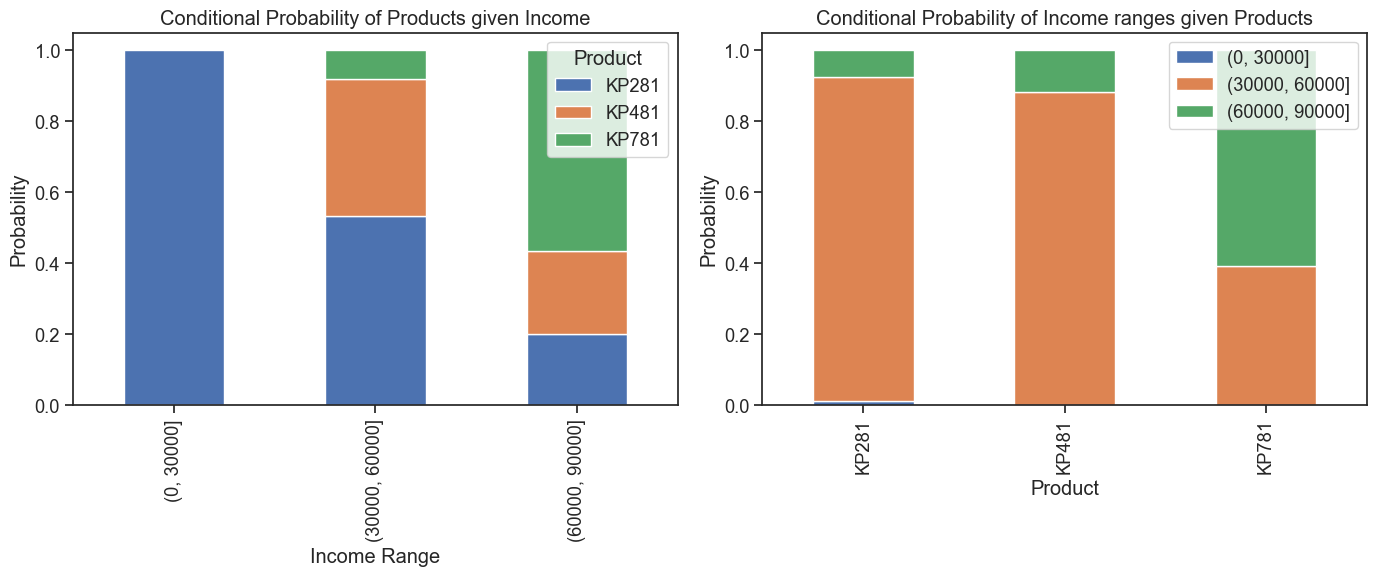

In [48]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar plot for Conditional Probability of Products given Income
conditional_prob_product_given_income.unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Conditional Probability of Products given Income')
axes[0].set_xlabel('Income Range')
axes[0].set_ylabel('Probability')

# Stacked bar plot for Conditional Probability of Income ranges given Products
conditional_prob_income_given_product.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Conditional Probability of Income ranges given Products')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Probability')

# Adjust layout
plt.tight_layout()
plt.show()


# Business insights:

* Income range (0, 30000) prefer KP281.
* Income range (30000, 60000) prefer KP481.
* Higher income range category people prefer KP781.

In [49]:
# Calculate conditional probability of Product given Age Category
conditional_prob_product_given_age = pd.crosstab(index=data['Age'], columns=data['Product'], normalize='index')

print("Conditional Probability of Products given Age Categories:")
print(conditional_prob_product_given_age)

Conditional Probability of Products given Age Categories:
Product     KP281     KP481     KP781
Age                                  
18       1.000000  0.000000  0.000000
19       0.750000  0.250000  0.000000
20       0.400000  0.600000  0.000000
21       0.571429  0.428571  0.000000
22       0.571429  0.000000  0.428571
23       0.444444  0.388889  0.166667
24       0.416667  0.250000  0.333333
25       0.280000  0.440000  0.280000
26       0.583333  0.250000  0.166667
27       0.428571  0.142857  0.428571
28       0.666667  0.000000  0.333333
29       0.500000  0.166667  0.333333
30       0.285714  0.285714  0.428571
31       0.333333  0.500000  0.166667
32       0.500000  0.500000  0.000000
33       0.250000  0.625000  0.125000
34       0.333333  0.500000  0.166667
35       0.375000  0.500000  0.125000
36       1.000000  0.000000  0.000000
37       0.500000  0.500000  0.000000
38       0.571429  0.285714  0.142857
39       1.000000  0.000000  0.000000
40       0.200000  0.600000  0

In [50]:
# Calculate conditional probability of Age Category given by product
conditional_prob_age_given_product = pd.crosstab(index=data['Product'], columns=data['Age'], normalize='index')

print("Conditional Probability of Age Category given by product:")
print(conditional_prob_age_given_product)

Conditional Probability of Age Category given by product:
Age          18        19     20    21     22        23      24        25  \
Product                                                                     
KP281    0.0125  0.037500  0.025  0.05  0.050  0.100000  0.0625  0.087500   
KP481    0.0000  0.016667  0.050  0.05  0.000  0.116667  0.0500  0.183333   
KP781    0.0000  0.000000  0.000  0.00  0.075  0.075000  0.1000  0.175000   

Age          26        27  ...      40      41     42      43      44  \
Product                    ...                                          
KP281    0.0875  0.037500  ...  0.0125  0.0125  0.000  0.0125  0.0125   
KP481    0.0500  0.016667  ...  0.0500  0.0000  0.000  0.0000  0.0000   
KP781    0.0500  0.075000  ...  0.0250  0.0000  0.025  0.0000  0.0000   

Age            45      46      47        48      50  
Product                                              
KP281    0.000000  0.0125  0.0125  0.000000  0.0125  
KP481    0.016667  0.0000  0

# Business insights:

* There is a noticeable shift in preferences for different products as customers transition from one age category to another.

## Marginal probability

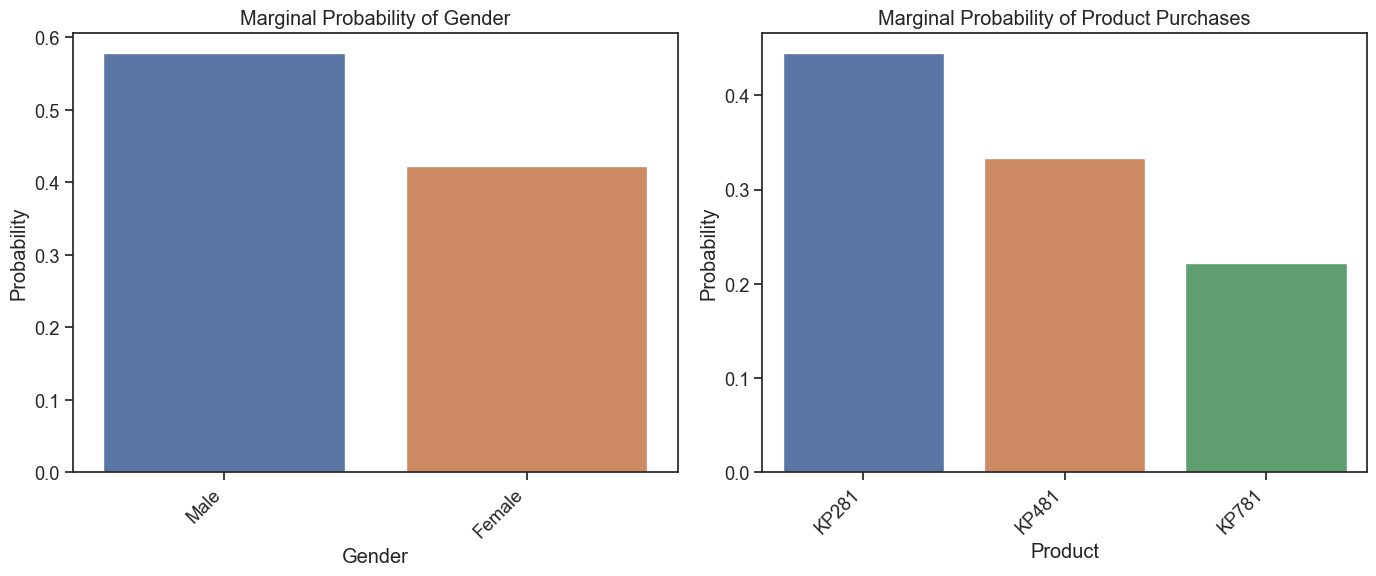

In [51]:
# Calculate marginal probability of Gender
marginal_prob_gender = data['Gender'].value_counts(normalize=True)

# Calculate marginal probability of Product purchases
marginal_prob_product = data['Product'].value_counts(normalize=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Marginal Probability of Gender
sns.barplot(x=marginal_prob_gender.index, y=marginal_prob_gender.values, ax=axes[0])
axes[0].set_title('Marginal Probability of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Probability')

# Bar plot for Marginal Probability of Product purchases
sns.barplot(x=marginal_prob_product.index, y=marginal_prob_product.values, ax=axes[1])
axes[1].set_title('Marginal Probability of Product Purchases')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Probability')

# Rotate x-axis labels for better visibility
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


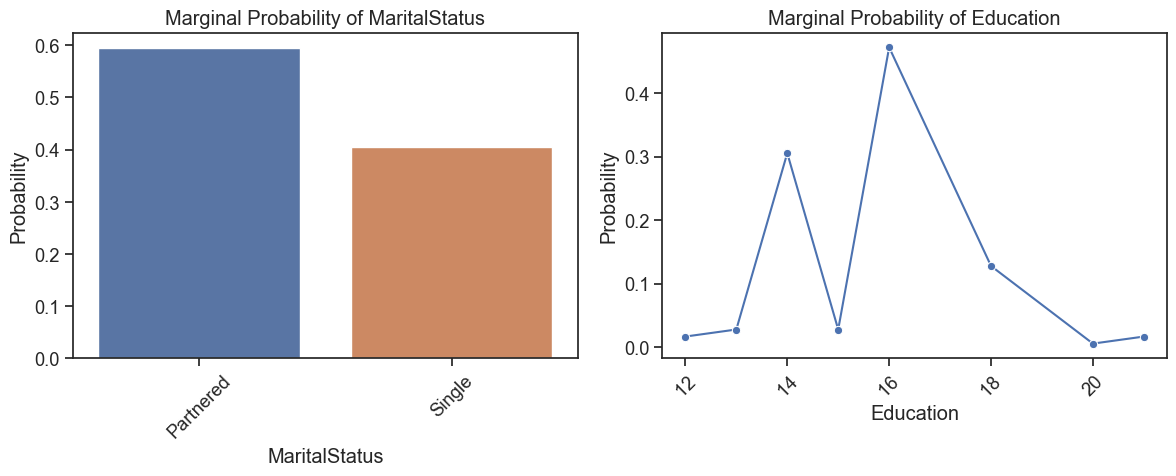

In [52]:
# Calculate marginal probabilities for Education and MaritalStatus
marginal_prob_education = data['Education'].value_counts(normalize=True)
marginal_prob_marital = data['MaritalStatus'].value_counts(normalize=True)

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create a bar plot for marginal probabilities of MaritalStatus
sns.barplot(x=marginal_prob_marital.index, y=marginal_prob_marital.values, ax=axes[0])
axes[0].set_title('Marginal Probability of MaritalStatus')
axes[0].set_xlabel('MaritalStatus')
axes[0].set_ylabel('Probability')
axes[0].tick_params(axis='x', rotation=45)

# Create a line plot for marginal probabilities of Education
sns.lineplot(x=marginal_prob_education.index, y=marginal_prob_education.values, marker='o', ax=axes[1])
axes[1].set_title('Marginal Probability of Education')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Probability')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


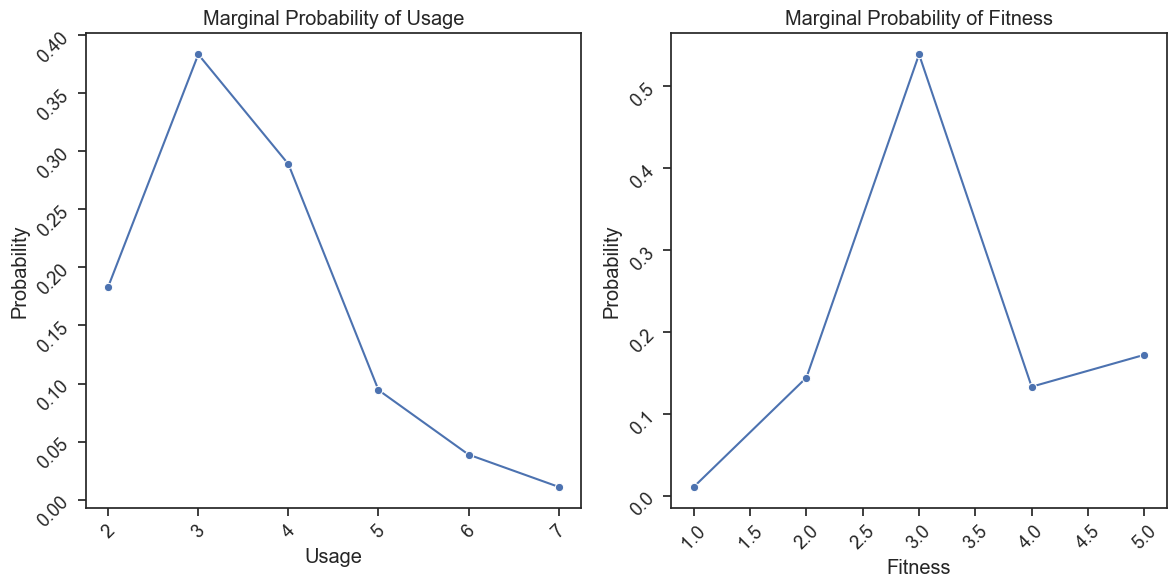

In [53]:
# Calculate marginal probability of Usage
marginal_prob_usage = data['Usage'].value_counts(normalize=True).sort_index()

# Calculate marginal probability of Fitness
marginal_prob_fitness = data['Fitness'].value_counts(normalize=True).sort_index()

# Create subplots for both line plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Line plot for marginal probability of Usage
sns.lineplot(x=marginal_prob_usage.index, y=marginal_prob_usage.values, marker='o', ax=axes[0])
axes[0].set_title('Marginal Probability of Usage')
axes[0].set_xlabel('Usage')
axes[0].set_ylabel('Probability')
axes[0].tick_params(rotation=45)

# Line plot for marginal probability of Fitness
sns.lineplot(x=marginal_prob_fitness.index, y=marginal_prob_fitness.values, marker='o', ax=axes[1])
axes[1].set_title('Marginal Probability of Fitness')
axes[1].set_xlabel('Fitness')
axes[1].set_ylabel('Probability')
axes[1].tick_params(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


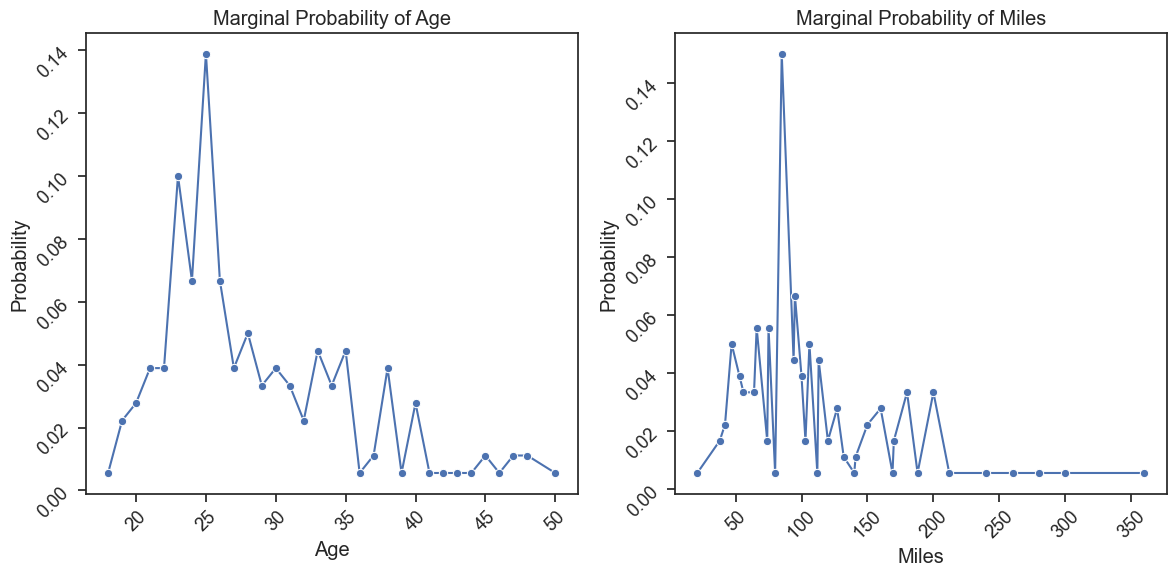

In [54]:
# Calculate marginal probability of Age
marginal_prob_age = data['Age'].value_counts(normalize=True).sort_index()

# Calculate marginal probability of Miles
marginal_prob_miles = data['Miles'].value_counts(normalize=True).sort_index()

# Create subplots for both line plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Line plot for marginal probability of Age
sns.lineplot(x=marginal_prob_age.index, y=marginal_prob_age.values, marker='o', ax=axes[0])
axes[0].set_title('Marginal Probability of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Probability')
axes[0].tick_params(rotation=45)

# Line plot for marginal probability of Miles
sns.lineplot(x=marginal_prob_miles.index, y=marginal_prob_miles.values, marker='o', ax=axes[1])
axes[1].set_title('Marginal Probability of Miles')
axes[1].set_xlabel('Miles')
axes[1].set_ylabel('Probability')
axes[1].tick_params(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


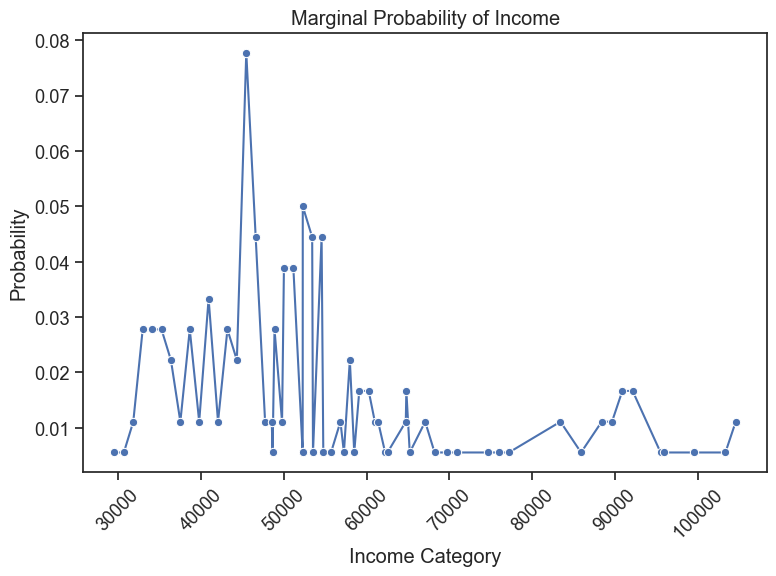

In [55]:
# Calculate marginal probability of Income
marginal_prob_income = data['Income'].value_counts(normalize=True).sort_index()

# Create a line plot for marginal probability of Income
plt.figure(figsize=(8, 6))
sns.lineplot(x=marginal_prob_income.index, y=marginal_prob_income.values, marker='o')
plt.title('Marginal Probability of Income')
plt.xlabel('Income Category')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Business insights:

* The proportions of customers with different income levels suggest that a significant portion of customers fall within the lower income ranges (e.g., 30,000 to 60,000).
* The proportions of customers purchasing each product (KP281, KP481, KP781) indicate that KP281 is the most popular product, followed by KP481 and KP781.
* The gender proportions show that there are more male customers compared to female customers.
* The proportions of customers based on marital status indicate that a higher proportion are partnered compared to single.
* The distribution of customers based on education levels highlights that a significant portion have education levels of 16 and 14.
* The proportions of customers based on usage levels indicate that a substantial portion engage in 3-4 days of usage.
* The age distribution of customers reveals that the majority fall within the age range of 23 to 35.
* The fitness level proportions show that a significant portion of customers have fitness levels of 3, indicating that these customers might be more focused on moderate to high-intensity workouts.
* The proportions of customers based on the distances they cover during workouts indicate that a variety of distances are common

## Recommendations:

* Product KP281 has the highest purchase frequency among customers, followed by KP481 and KP781. Consider focusing on promoting these products further to maximize revenue.
* Product KP781 has a significant customer base in terms of total revenue. Invest in strategies to maintain and enhance its popularity.
* Targeted marketing efforts should be directed towards males and partnered customers, as they are more likely to purchase fitness products.
* Focus on tailoring products and campaigns to different age groups, as preferences and purchasing patterns vary across age categories.
* Customers with Education level 14 and 16 have the highest purchase frequencies. Create marketing content that resonates with these education levels and addresses their specific needs.
* Fitness level 3 is the most common among customers and correlates with higher purchase rates. Develop products that cater to customers with fitness level 3.
* Customers using fitness products 3 times a week show the highest purchase frequency. Consider offering incentives or discounts to encourage consistent product usage.
* Products are purchased across different income levels, indicating a diverse customer base. However, consider adjusting pricing strategies based on income brackets to cater to different customer segments.
* Utilize the insights gained from bivariate analyses and pair plots to create targeted marketing campaigns for specific customer segments. This personalized approach can improve customer engagement.
* The majority of customers fall into the lower income brackets. Offer a variety of price points and consider introducing entry-level products to cater to this segment.
* Consider introducing more products that appeal to both genders. While there are differences in preferences, there's an opportunity to expand product offerings for greater inclusivity.
* Marital status and age influence purchasing behavior. Leverage these insights to design products and marketing campaigns that align with the preferences of partnered and single customers across different age groups.